# Forbes World's Billionaires List 2022

The world's richest in 2022

## Introduction

In total, 2,668 people/family are in this year list. 

# Set Up

## Import Statements

In [1]:
pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 31.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=e2c2b6365c1b80ab8eb413ad1ca1dd87d16052aef98c628671449410e62f2bd4
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry


In [2]:
pip install pywaffle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 26.1 MB 57.9 MB/s 


In [3]:
pip install pycountry-convert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 208 kB 43.4 MB/s 
     |████████████████████████████████| 297 kB 43.4 MB/s 
     |████████████████████████████████| 297 kB 47.3 MB/s 
     |████████████████████████████████| 297 kB 46.1 MB/s 
     |████████████████████████████████| 296 kB 65.5 MB/s 
     |████████████████████████████████| 296 kB 52.1 MB/s 
     |████████████████████████████████| 280 kB 51.8 MB/s 
     |████████████████████████████████| 280 kB 50.6 MB/s 
     |████████████████████████████████| 280 kB 9.5 MB/s 
     |████████████████████████████████| 280 kB 46.1 MB/s 
     |████████████████████████████████| 279 kB 46.2 MB/s 
     |████████████████████████████████| 279 kB 10.9 MB/s 
     |████████████████████████████████| 272 kB 48.0 MB/s 
     |████████████████████████████████| 272 kB 46.2 MB/s 
     |████████████████████████████████| 272 kB 44.3 MB/s 
     |██████████████████████████

In [4]:
#Import Library
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pycountry
import holoviews as hv #Sankey import 
import pycountry_convert as pc


from random import randint

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from pywaffle import Waffle
from plotly.subplots import make_subplots

## Notebook Presentation

In [5]:
pd.options.display.float_format = '{:,.2f}'.format

#random color
color = []
for i in range(50):
    color.append('#%06X' % randint(0, 0xFFFFFF))

In [6]:
#Function to set up country_name to continent
def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

## Load the Data

In [8]:
df_data = pd.read_csv('/content/forbes_2022_billionaires.csv' , encoding="windows-1252")

In [9]:

##san_checker = pd.read_csv('/content/sankey_checker.csv' , encoding="windows-1252")

FileNotFoundError: ignored

# Data Exploration & Cleaning

Preliminary data exploration.


*   What is the shape of df_data? How many rows and columns? 
*   What are the column names?


In [10]:
df_data['checker'] = 1

In [11]:
df_data['finalWorth_percent'] = df_data['finalWorth'] / df_data.groupby('checker')['finalWorth'].transform('sum')

In [12]:
df_data['finalWorth'] = df_data['finalWorth'] *1000*1000

In [13]:
df_data['finalWorth_B'] = df_data['finalWorth'] /1000/1000/1000

In [14]:
def check_B_Group(num):
  if num > 200:
    return '>200'
  elif num > 175:
    return '>175'
  elif num > 150:
    return '>150'
  elif num > 125:
    return '>125'  
  elif num > 100:
    return '>100'
  elif num > 75:
    return '>75'
  elif num > 50:
    return '>50'
  elif num > 25:
    return '>25'
  else:
    return '<=25'

In [15]:
df_data['finalWorth_B_Group'] = [check_B_Group(num) for num in df_data['finalWorth_B']]

In [16]:
#data cleaning
df_data['countryOfCitizenship']=df_data['countryOfCitizenship'].replace('Eswatini (Swaziland)','Switzerland')

In [17]:
df_data['countryOfCitizenship_continent'] = df_data['countryOfCitizenship']

In [18]:
df_data['countryOfCitizenship_continent'] = [country_to_continent(country) \
                                                         for country in df_data['countryOfCitizenship_continent']]

In [19]:
df_data['countryOfCitizenship_continent'] = df_data['countryOfCitizenship_continent'].replace('South America', 'South America+Oceania+Africa')
df_data['countryOfCitizenship_continent'] = df_data['countryOfCitizenship_continent'].replace('Oceania', 'South America+Oceania+Africa')
df_data['countryOfCitizenship_continent'] = df_data['countryOfCitizenship_continent'].replace('Africa', 'South America+Oceania+Africa')

In [20]:
#What is the shape of df_data? How many rows and columns?
df_data.shape

(2668, 28)

In [21]:
#What are the column names?
df_data.columns

Index(['rank', 'personName', 'age', 'finalWorth', 'year', 'month', 'category',
       'source', 'country', 'state', 'city', 'countryOfCitizenship',
       'organization', 'selfMade', 'gender', 'birthDate', 'title',
       'philanthropyScore', 'residenceMsa', 'numberOfSiblings', 'bio', 'about',
       'check', 'checker', 'finalWorth_percent', 'finalWorth_B',
       'finalWorth_B_Group', 'countryOfCitizenship_continent'],
      dtype='object')

In [22]:
#dataframe 
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   rank                            2668 non-null   int64  
 1   personName                      2668 non-null   object 
 2   age                             2582 non-null   float64
 3   finalWorth                      2668 non-null   int64  
 4   year                            2668 non-null   int64  
 5   month                           2668 non-null   int64  
 6   category                        2668 non-null   object 
 7   source                          2668 non-null   object 
 8   country                         2655 non-null   object 
 9   state                           748 non-null    object 
 10  city                            2624 non-null   object 
 11  countryOfCitizenship            2668 non-null   object 
 12  organization                    35

In [23]:
#dataset summary
df_data.describe()

,rank,age,finalWorth,year,month,philanthropyScore,numberOfSiblings,checker,finalWorth_percent,finalWorth_B
count,"2,668.00","2,582.00","2,668.00","2,668.00","2,668.00",396.00,127.00,"2,668.00","2,668.00","2,668.00"
mean,"1,302.92",64.21,"4,762,350,074.96","2,022.00",4.00,1.86,2.73,1.00,0.00,4.76
std,747.81,13.40,"10,540,482,258.47",0.00,0.00,0.97,1.89,0.00,0.00,10.54
min,1.00,19.00,"1,000,000,000.00","2,022.00",4.00,1.00,1.00,1.00,0.00,1.00
25%,665.00,55.00,"1,500,000,000.00","2,022.00",4.00,1.00,2.00,1.00,0.00,1.50
50%,"1,292.00",64.00,"2,400,000,000.00","2,022.00",4.00,2.00,2.00,1.00,0.00,2.40
75%,"1,929.00",74.00,"4,300,000,000.00","2,022.00",4.00,2.00,3.00,1.00,0.00,4.30
max,"2,578.00",100.00,"219,000,000,000.00","2,022.00",4.00,5.00,14.00,1.00,0.02,219.00


## Check for Duplicates

In [24]:
print(f'Any duplicates? {df_data.duplicated().values.any()}')

Any duplicates? False


## Check for NaN Values

In [25]:
print(f'Any NaN values among the data? {df_data.isna().values.any()}')
print(df_data.isna().sum())

Any NaN values among the data? True
rank                                 0
personName                           0
age                                 86
finalWorth                           0
year                                 0
month                                0
category                             0
source                               0
country                             13
state                             1920
city                                44
countryOfCitizenship                 0
organization                      2316
selfMade                             0
gender                              16
birthDate                           99
title                             2267
philanthropyScore                 2272
residenceMsa                      2029
numberOfSiblings                  2541
bio                                  0
about                             1106
check                                0
checker                              0
finalWorth_percent          

# Analysis

## % of Male / Female

No handles with labels found to put in legend.


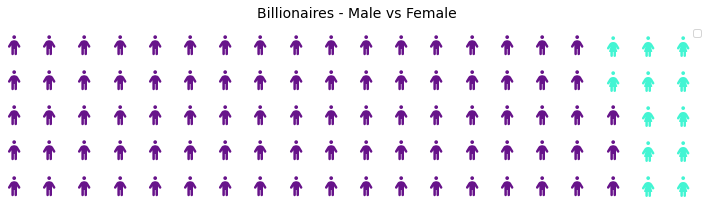

In [26]:
pic = df_data['gender'].value_counts(normalize=True).mul(100).round(1) \
      .rename_axis('col').reset_index(name='counts')

graph =pic.set_index('col').T.to_dict('records')

fig = plt.figure(FigureClass=Waffle, 
                 figsize=(10,10), 
                 values=graph[0], 
                 rows=5,
                 colors=[color[1],color[7]] ,
                 icons=['person', 'person-dress'], #https://fontawesome.com/search?s=solid%2Cbrands
                #  icons=['male', 'female'], #https://fontawesome.com/search?s=solid%2Cbrands
                 font_size=20,
                 icon_legend=False,
                 legend={
                     'labels': ['person', 'person'], 
                     'loc': 'upper left', 
                     'bbox_to_anchor': (1, 1)
    }
                 )
plt.title('Billionaires - Male vs Female', fontsize=14)
plt.legend()
plt.show()


## % of Self Made

No handles with labels found to put in legend.


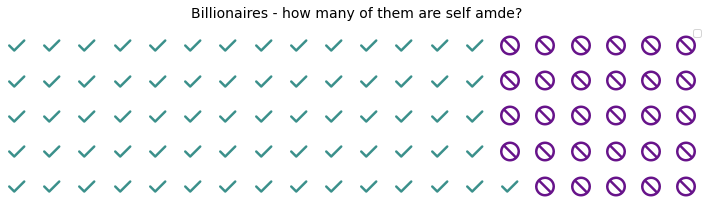

In [27]:
pic = df_data['selfMade'].value_counts(normalize=True).mul(100).round(1) \
      .rename_axis('col').reset_index(name='counts')

graph =pic.set_index('col').T.to_dict('records')
    
fig = plt.figure(FigureClass=Waffle, 
                 figsize=(10,10), 
                 values=graph[0], 
                 rows=5,
                 colors=color[:2],
                 icons=['check', 'ban'], #https://fontawesome.com/search?s=solid%2Cbrands
                 font_size=20,
                 icon_legend=True,
                 )
plt.title('Billionaires - how many of them are self amde?', fontsize=14)
plt.legend()
plt.show()



## % of Citizanehip 

In [28]:
pic_2 = df_data['countryOfCitizenship_continent'].value_counts(normalize=True) \
      .rename_axis('col').reset_index(name='counts')

In [29]:
#checker for adding up 100%
pic_2['counts_'] = pic_2['counts']*100
pic_2['counts_int'] = pic_2['counts_'].apply(np.floor)
pic_2['counts_dig'] =pic_2['counts_'] -pic_2['counts_int'] 
checker_ = 100 - sum(pic_2['counts_int'])
pic_2["Rank"] = pic_2["counts_dig"].rank(ascending=False)

In [30]:
#checker for final figure
pic_2.loc[pic_2["Rank"]<= checker_, 'counts-final'] = pic_2['counts_int'] + 1
pic_2.loc[pic_2["Rank"]> checker_, 'counts-final'] =  pic_2['counts_int'] 


In [31]:
#To set up the finaltable 
pic = pic_2[['col', 'counts-final']].sort_values('col')

No handles with labels found to put in legend.


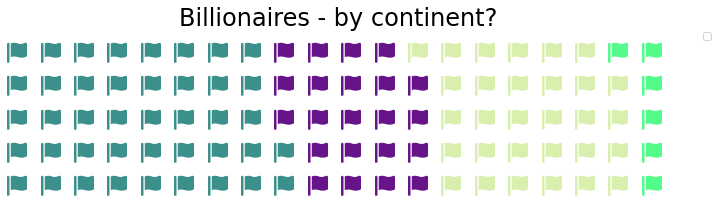

In [32]:
pic = pic_2[['col', 'counts-final']].sort_values('col')
graph =pic.set_index('col').T.to_dict('records')
fig = plt.figure(FigureClass=Waffle, 
                 figsize=(10,10), 
                 values=graph[0], 
                 rows=5,
                 colors=color[:4],
                 icons=['flag','flag','flag','flag'], 
                 #https://fontawesome.com/search?s=solid%2Cbrands
                 font_size=20,
                #  icon_legend=False,
                #  legend='False',
                 )
plt.title('Billionaires - by continent?', fontsize=24)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()


In [33]:
pic_3 = df_data.groupby(['countryOfCitizenship_continent'])['finalWorth_percent'].sum() \
        .rename_axis('col').reset_index(name='counts')

      # normalize=True

In [34]:
#checker for adding up 100%
pic_3['counts_'] = pic_3['counts']*100
pic_3['counts_int'] = pic_3['counts_'].apply(np.floor)
pic_3['counts_dig'] =pic_3['counts_'] -pic_3['counts_int'] 
checker_ = 100 - sum(pic_3['counts_int'])
pic_3["Rank"] = pic_3["counts_dig"].rank(ascending=False)

In [35]:
#checker for final figure
pic_3.loc[pic_3["Rank"]<= checker_, 'counts-final'] = pic_3['counts_int'] + 1
pic_3.loc[pic_3["Rank"]> checker_, 'counts-final'] =  pic_3['counts_int'] 

In [36]:
#To set up the finaltable 
pic = pic_3[['col', 'counts-final']].sort_values('col')

In [37]:
graph =pic.set_index('col').T.to_dict('records')

No handles with labels found to put in legend.


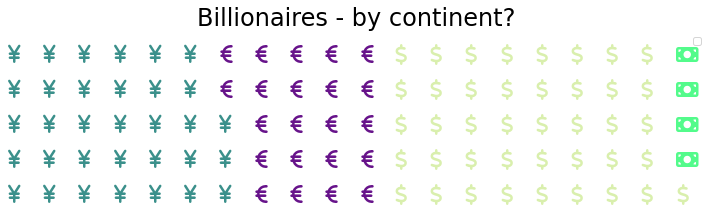

In [38]:
fig = plt.figure(FigureClass=Waffle, 
                 figsize=(10,10), 
                 values=graph[0], 
                 rows=5,
                 colors=color[:4],
                 icons=['yen-sign','euro-sign','dollar-sign','money-bill'], 
                 #https://fontawesome.com/search?s=solid%2Cbrands
                 font_size=20,
                 icon_legend=False,
                #  label= ['yen-sign','euro-sign','dollar-sign','money-bill']
                 )
plt.title('Billionaires - by continent?', fontsize=24)
plt.legend()
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          # ncol=3, fancybox=True, shadow=True)
plt.show()


## Youngest and Oldest Billionaires

In [39]:
print(df_data[['personName','age','finalWorth']].sort_values(['age'], ascending=True).head(1))
print(df_data[['personName','age','finalWorth']].sort_values(['age'], ascending=False).head(1))

               personName   age  finalWorth
1311  Kevin David Lehmann 19.00  2400000000
         personName    age  finalWorth
1681  George Joseph 100.00  1800000000


## Top 30 Billionaire

In [40]:
#bar chart for top 20  Billionaires

v_bar = px.bar(df_data[:30], 
        x = 'personName',
        y = 'finalWorth',
        color = 'gender', #color by group : cat_men_women.sex
        # color_continuous_scale='Aggrnyl',
        title='Top 30 Billionaires'
        )

v_bar.update_layout(xaxis_title='Name', 
                    yaxis_title='Final Worth', 
                    xaxis_categoryorder = 'total descending'
                    )

v_bar.show()

Elon Musk with worth of USD$ 219B to be top of the spot. 

Only 4 ladies were in the top 30; Francoise Bettencourt Meyers & family is the richest female on the list, rank in 14 with USD$ 74.8B 


In [41]:
colors = {'TRUE':'steelblue',
          'FALSE':'firebrick'}

for t in df_data['selfMade'].unique():
    dfp = df_data[df_data['selfMade']==t]


In [42]:
fig = make_subplots(rows=1, cols=2, shared_yaxes=False, subplot_titles=('Worth by Gender','Worth by SelfMade'))

#https://stackoverflow.com/questions/61892036/plotly-how-to-colorcode-plotly-graph-objects-bar-chart-using-python
y = df_data['gender'][:30]
z = df_data['selfMade'][:30]

def SetColor_0(y):
        if(y == 'F'):
            return color[0]
        elif(y == 'M'):
            return color[1]
        else:
            return color[2]

def SetColor_1(z):
        if  (z == df_data['selfMade'][1]):
            return color[10]
        elif(z == df_data['selfMade'][2]):
            return color[11]
        else:
            return color[12]


fig.add_trace(go.Bar(x=df_data['personName'][:30], 
                     y=df_data['finalWorth'][:30],
                     marker=dict(color = list(map(SetColor_0, y))),

                     ),
              1, 1)

fig.add_trace(go.Bar(x=df_data['personName'][:30], 
                     y=df_data['finalWorth'][:30],
                     marker=dict(color = list(map(SetColor_1, z))),
                     showlegend=True,

                     ),
              1, 2)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), 
                  template="plotly_dark",
                  title='Top 30 Billionaire')


fig.show()

Histogram by final worth at the time of April 2022


In [43]:
# data=df_data

box = px.box(df_data,
            #  x='category',
             y='finalWorth',
            #  points='all', 
            #  color='category',

             title='Price per Category')

box.update_layout(xaxis_title='Category',
                  yaxis_title='USD$',
                  # yaxis=dict(type='log')
                  
                  )

box.show()

''

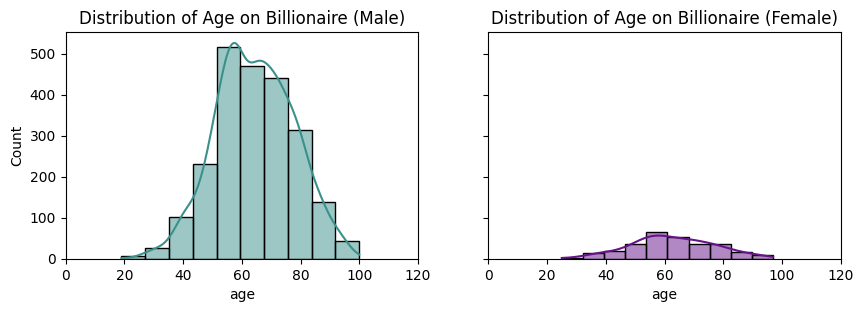

In [44]:
df_data_m = df_data.loc[(df_data['gender'] == 'M'),  ['age']]
df_data_f = df_data.loc[(df_data['gender'] == 'F'),  ['age']]

x1 = df_data_m
x2 = df_data_f
# plot
fig, axes = plt.subplots(1, 2, figsize=(10, 3), sharey=True, dpi=100)

sns.histplot(data=x1,
             x=x1.iloc[:, 0],
             bins=10,
             kde=True, 
             color=color[0],
             ax=axes[0])\
             .set(title='Distribution of Age on Billionaire (Male)',
                             xlim=(0, 120))


sns.histplot(data=x2,
             x=x2.iloc[:, 0],
             bins=10,
             kde=True, 
             color=color[1], 
             ax=axes[1]) \
             .set(title='Distribution of Age on Billionaire (Female)',
                xlim=(0, 120))

;

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



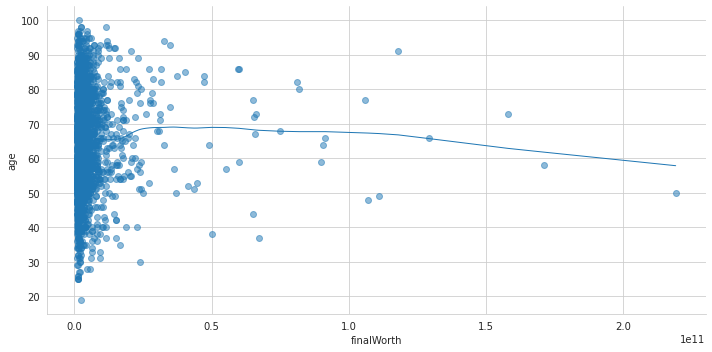

In [45]:
with sns.axes_style("whitegrid"):
    sns.lmplot(data=df_data,
               x='finalWorth',
               y='age',
               
         #  hue='gender',
               lowess=True, 
               aspect=2,
               scatter_kws={'alpha': 0.5},
               line_kws={'linewidth': 1})

# plt.ylim(0,100)
plt.show()

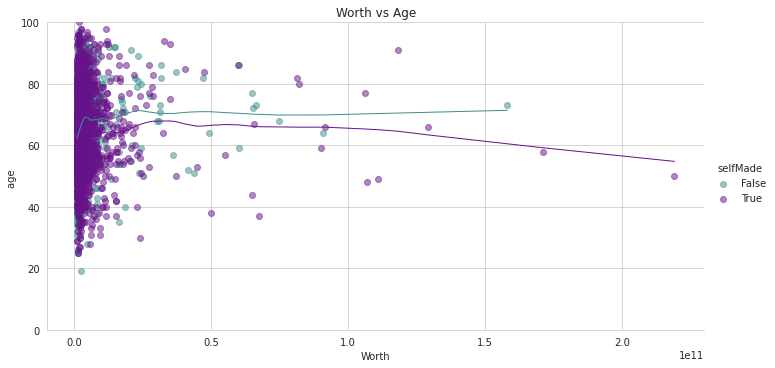

In [46]:
sns.set_palette(color)
with sns.axes_style("whitegrid"):
    ax = sns.lmplot(data=df_data,
               x='finalWorth',
               y='age',
               hue='selfMade',
              #  size='checker', sizes=(40, 40),
               lowess=True, 
               aspect=2,
               scatter_kws={'alpha': 0.5},
               line_kws={'linewidth': 1})

    ax.set(ylim=(0, 100),
        # xlim=(0, 450000000),
        ylabel='age ',
        xlabel='Worth',
        title= 'Worth vs Age'
        )

plt.show()

In [47]:
df_data_55=df_data[:55]

In [48]:
sankey = df_data_55.groupby([ 'gender','countryOfCitizenship_continent'])[ 'finalWorth'].count()\
.rename_axis([ 'L0','l1']).reset_index(name='counts')

In [49]:
sankey_2 = df_data_55.groupby([ 'countryOfCitizenship_continent','category'])[ 'finalWorth'].count()\
.rename_axis([  'L0','l1']).reset_index(name='counts')

In [50]:
sankey_1 =sankey
sankey_1=sankey.append(sankey_2)

In [51]:
sankey

,L0,l1,counts
0,F,Europe,1
1,F,North America,5
2,F,South America+Oceania+Africa,1
3,M,Asia,12
4,M,Europe,11
5,M,North America,24


In [52]:
hv.extension('bokeh')
sankey1 = hv.Sankey(sankey_1, kdims=['L0','l1'], vdims=['counts'])
sankey1.opts(cmap='Colorblind',
             label_position='left',
             edge_color='L0', 
             edge_line_width=0,
             node_alpha=1.0, 
             node_width=40, 
             node_sort=True,
             width=800, 
             height=600, 
             bgcolor="snow",
             title='Gender to countryOfCitizenship_continent')


Output hidden; open in https://colab.research.google.com to view.

In [53]:
fig = px.sunburst(sankey, 
                  path=['L0','l1'], 
                  values='counts',
                  color='counts',
                  color_continuous_scale='aggrnyl')
fig.update_layout(uniformtext=dict(minsize=10, mode='hide'))
fig.show()

In [54]:
table = df_data.groupby(['category'])['age', 'finalWorth'].agg(['mean','count']).rename_axis(['category'])
table.columns = ['age_mean', 'age_count', 'finalWorth_mean', 'finalWorth_count']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [55]:
table

,age_mean,age_count,finalWorth_mean,finalWorth_count
category,,,,
Automotive,63.60,67,"8,337,142,857.14",70
Construction & Engineering,65.22,45,"2,693,478,260.87",46
Diversified,68.47,175,"5,230,555,555.56",180
Energy,66.81,93,"4,182,105,263.16",95
Fashion & Retail,67.40,242,"6,468,800,000.00",250
Finance & Investments,64.50,383,"4,439,540,816.33",392
Food & Beverage,65.99,194,"4,607,635,467.98",203
Gambling & Casinos,67.61,23,"4,678,260,869.57",23
Healthcare,63.92,209,"3,289,861,751.15",217


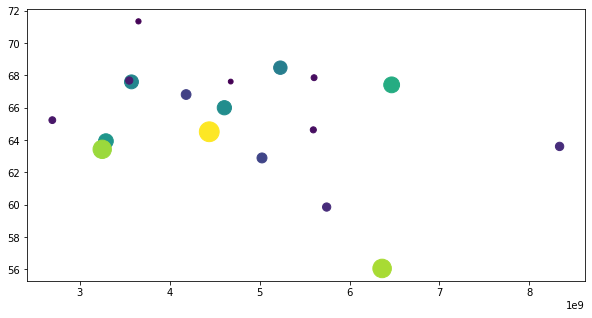

In [56]:
plt.figure(figsize = (10, 5))
plt.scatter(data=table,
            x='finalWorth_mean', 
            y='age_mean',
            s='finalWorth_count',
            c='finalWorth_count', 
           
             )
plt.show()

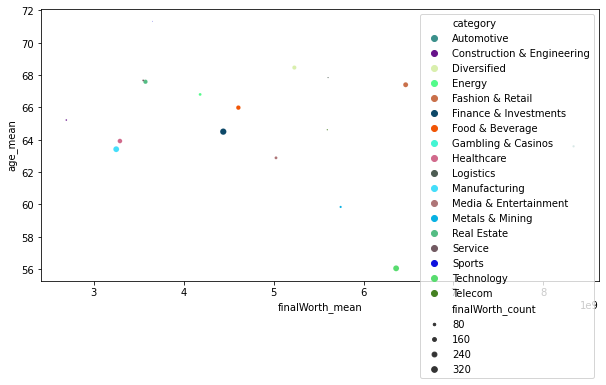

In [57]:
plt.figure(figsize = (10, 5))
sns.scatterplot(data=table,
                x='finalWorth_mean', 
                y='age_mean', 
                hue='category', 
                size='finalWorth_count', 
                sizes=(0, 40),
  )
# plt.axis('equal')
plt.legend()
plt.show()

In [58]:
list(pycountry.countries)[0]
countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

In [59]:
countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

In [60]:
df_data['countryOfCitizenship_alpha_3'] = df_data['countryOfCitizenship'] 

In [61]:
df_data['countryOfCitizenship_alpha_3'] = [countries.get(country, 'Unknown code') \
                                                         for country in df_data['countryOfCitizenship_alpha_3']]

In [62]:
graph_ = df_data.groupby(['countryOfCitizenship_alpha_3'])['rank'].count()\
                    .rename_axis(['country_code'])\
                    .reset_index(name='counts')

In [63]:
world_map = px.choropleth(graph_,
                          locations='country_code',
                          color='counts', 
                          hover_name='country_code', 
                          color_continuous_scale=px.colors.diverging.Fall)

world_map.update_layout(coloraxis_showscale=True,)

world_map.show()